<a href="https://colab.research.google.com/github/SagyaGhimire/5CS037/blob/main/Worksheet4_SagyaGhimire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem - 1: Perform a classification task with knn from scratch.
1. Load the Dataset:

• Read the dataset into a pandas DataFrame.

• Display the first few rows and perform exploratory data analysis (EDA) to understand the dataset
(e.g., check data types, missing values, summary statistics).

2. Handle Missing Data:

• Handle any missing values appropriately, either by dropping or imputing them based on the data.

3. Feature Engineering:

• Separate the feature matrix (X) and target variable (y).

• Perform a train - test split from scratch using a 70% − 30% ratio.

4. Implement KNN:

• Build the KNN algorithm from scratch (no libraries like sickit-learn for KNN).

• Compute distances using Euclidean distance.

• Write functions for:

– Predicting the class for a single query.

– Predicting classes for all test samples.

• Evaluate the performance using accuracy.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv("/content/sample_data/diabetes_.csv")
print(data.head())
print(data.info())
print(data.describe()) #statistics
print("\nMissing values:\n", data.isnull().sum())



   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

In [ ]:
missing_data = data.isnull().sum()
print("Missing data:\n", missing_data)

#if missing data is more than 10% then we are filling it with mean otherwise dropping the rows wich has no values for that column
for column in data.columns:
    if missing_data[column] > 10:
        data[column].fillna(data[column].mean(), inplace=True)
    else:
        data.dropna(subset=[column], inplace=True)

print("\ndata after making changes:")
print(data.isnull().sum())
print("data shape:" ,data.shape)


Missing data:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

data after making changes:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
data shape: (768, 9)


In [ ]:
# 3. Feature Engineering:
# • Separate the feature matrix (X) and target variable (y).
X = data.drop(columns=["Outcome"]).values
y = data["Outcome"].values

# • Perform a train - test split from scratch using a 70% − 30% ratio.
def train_test_split_scratch(X, y, test_size=0.3, random_seed=42):
    np.random.seed(random_seed)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    test_size_count = int(len(X) * test_size)
    test_indices = indices[:test_size_count]
    train_indices = indices[test_size_count:]

    return X[train_indices], X[test_indices], y[train_indices], y[test_indices]
X_train, X_test, y_train, y_test = train_test_split_scratch(X, y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(538, 8) (230, 8) (538,) (230,)


In [ ]:
# 4. Implement KNN:
# • Build the KNN algorithm from scratch (no libraries like sickit-learn for KNN).
# • Compute distances using Euclidean distance.
def euclidean_distance(point1, point2):
    if point1.shape != point2.shape:
        raise ValueError("Points must have the same dimensions to calculate Euclidean distance.")
    distance= np.sqrt(np.sum((point1 - point2) ** 2))
    return distance

# – Predicting the class for a single query.
def knn_predict_single(query, X_train, y_train, k=3):
    distances = [euclidean_distance(query, x) for x in X_train]
    nearest_indices = np.argsort(distances)[:k]
    nearest_labels = y_train[nearest_indices]
    prediction= np.bincount(nearest_labels).argmax()
    return prediction

# – Predicting classes for all test samples.
def knn_predict(X_test, X_train, y_train, k=3):
    prediction=[knn_predict_single(x, X_train, y_train, k) for x in X_test]
    return np.array(prediction)

# • Evaluate the performance using accuracy.
def compute_accuracy(y_true, y_pred):
    correct_predictions = np.sum(y_true == y_pred)
    total_predictions = len(y_true)
    accuracy = (correct_predictions / total_predictions) * 100
    return accuracy

prediction = knn_predict(X_test, X_train, y_train, k=3)
accuracy = compute_accuracy(y_test, prediction)
print(f"Accuracy of the KNN model on the test set: {accuracy:.2f}%")


Accuracy of the KNN model on the test set: 67.39%


Problem - 2 - Experimentation:
1. Repeat the Classification Task:

• Scale the Feature matrix X.

• Use the scaled data for training and testing the kNN Classifier.

• Record the results.

2. Comparative Analysis: Compare the Results -

• Compare the accuracy and performance of the kNN model on the original dataset from problem 1
versus the scaled dataset.

• Discuss:

– How scaling impacted the KNN performance.

– The reason for any observed changes in accuracy.

In [ ]:
# 1. Repeat the Classification Task:
# • Scale the Feature matrix X.
def standard_scaler(X):
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    return (X - mean) / std
# Scale features
X_scaled = standard_scaler(X)
# Split scaled data
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split_scratch(X_scaled, y)

# • Use the scaled data for training and testing the kNN Classifier.
scaled_predictions = knn_predict(X_test_s, X_train_s, y_train_s, k=3)
scaled_accuracy = compute_accuracy(y_test_s, scaled_predictions)
print(f"Accuracy (Scaled Data): {scaled_accuracy:.2f}%")






Accuracy (Scaled Data): 70.87%


Accuracy improves after scaling because KNN relies on distance calculations. Without scaling, features with larger values dominate distances. Scaling balances all features, allowing KNN to identify true nearest neighbors, resulting in more accurate and reliable predictions.


Problem - 3 - Experimentation with k:
1. Vary the number of neighbors - k:

• Run the KNN model on both the original and scaled datasets for a range of:

k= 1, 2, 3, . . . 15

• For each k, record:

– Accuracy.

– Time taken to make predictions.

2. Visualize the Results:

• Plot the following graphs:

– k vs. Accuracy for original and scaled datasets.

– k vs. Time Taken for original and scaled datasets.

3. Analyze and Discuss:

• Discuss how the choice of k affects the accuracy and computational cost.

• Identify the optimal k based on your analysis.

In [ ]:
# 1. Vary the number of neighbors - k:
# • Run the KNN model on both the original and scaled datasets for a range of:
# k= 1, 2, 3, . . . 15
# • For each k, record:
# – Accuracy.
# – Time taken to make predictions.
k_values = range(1, 16)
acc_original, acc_scaled = [], []
time_original, time_scaled = [], []

for k in k_values:
    # Original data
    start = time.time()
    preds = knn_predict(X_test, X_train, y_train, k)
    time_original.append(time.time() - start)
    acc_original.append(compute_accuracy(y_test, preds))

    # Scaled data
    start = time.time()
    preds_s = knn_predict(X_test_s, X_train_s, y_train_s, k)
    time_scaled.append(time.time() - start)
    acc_scaled.append(compute_accuracy(y_test_s, preds_s))
for i, k in enumerate(k_values):
    print(f"k = {k}")
    print(f"Original Data  Accuracy: {acc_original[i]:.2f}%, Time: {time_original[i]:.6f} seconds")
    print(f"Scaled Data    Accuracy: {acc_scaled[i]:.2f}%, Time: {time_scaled[i]:.6f} seconds")




k = 1
Original Data  Accuracy: 68.70%, Time: 0.860768 seconds
Scaled Data    Accuracy: 62.17%, Time: 0.861874 seconds
k = 2
Original Data  Accuracy: 72.61%, Time: 0.825591 seconds
Scaled Data    Accuracy: 66.96%, Time: 0.817658 seconds
k = 3
Original Data  Accuracy: 67.39%, Time: 0.800495 seconds
Scaled Data    Accuracy: 70.87%, Time: 0.860247 seconds
k = 4
Original Data  Accuracy: 72.17%, Time: 0.824224 seconds
Scaled Data    Accuracy: 69.13%, Time: 0.826407 seconds
k = 5
Original Data  Accuracy: 68.70%, Time: 0.824155 seconds
Scaled Data    Accuracy: 69.13%, Time: 0.847599 seconds
k = 6
Original Data  Accuracy: 70.00%, Time: 1.199016 seconds
Scaled Data    Accuracy: 68.70%, Time: 1.451860 seconds
k = 7
Original Data  Accuracy: 69.13%, Time: 1.054941 seconds
Scaled Data    Accuracy: 71.74%, Time: 0.869754 seconds
k = 8
Original Data  Accuracy: 71.30%, Time: 0.812634 seconds
Scaled Data    Accuracy: 68.26%, Time: 0.814335 seconds
k = 9
Original Data  Accuracy: 70.00%, Time: 0.828359 se

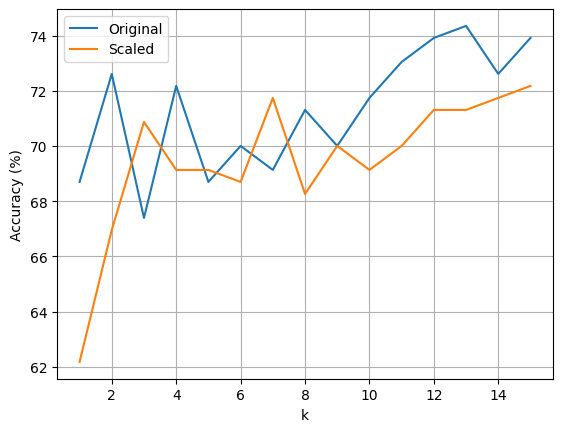

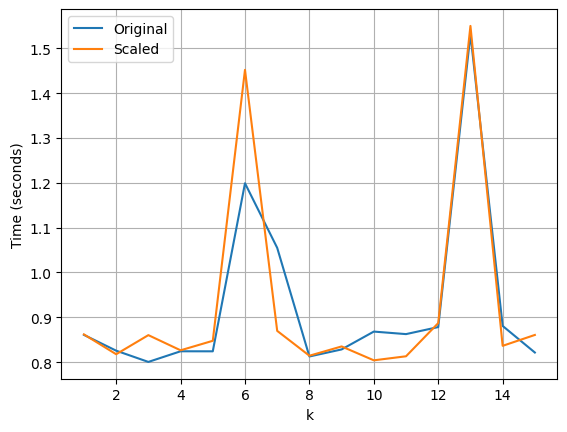

In [ ]:
# Accuracy plot
plt.figure()
plt.plot(k_values, acc_original, label="Original")
plt.plot(k_values, acc_scaled, label="Scaled")
plt.xlabel("k")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.grid()
plt.show()

# Time plot
plt.figure()
plt.plot(k_values, time_original, label="Original")
plt.plot(k_values, time_scaled, label="Scaled")
plt.xlabel("k")
plt.ylabel("Time (seconds)")
plt.legend()
plt.grid()
plt.show()


k vs Accuracy graph:

This graph shows how KNN accuracy changes with different values of k. When k is small, the model may be very accurate but sensitive to noise. As k increases, accuracy becomes more stable and usually improves. If k becomes too large, accuracy may drop due to underfitting. The scaled dataset performs better because scaling balances feature influence.

k vs Time Taken graph:

This graph shows how prediction time changes with k. Time increases slightly as k increases, but the difference is small. Most time is spent calculating distances, not choosing neighbors. Both scaled and unscaled data take similar time, showing scaling improves accuracy without affecting speed much.

* Small k = model is very sensitive to noise (high variance)
* Large k= model is smoother but slower and may miss patterns
* Best k= where accuracy is highest with acceptable time
* Feature scaling helps KNN perform better and more consistently
